## This lab investigates second order differential equations, their solution and qualitative behaviors.


We will look at two methods of solving higher order differential equations. They both have advantages and disadvantages. When doing this lab, think about the differences between the two methods, and the differences between first and second order differential equations.

In [ ]:
## import packages
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
from sympy import Symbol, symbols, Function, diff, Eq

Consider a general second order differential equation $\frac{d^2y}{dt^2}=f(t,y,\frac{dy}{dt})$, given the initial conditions $y(0)=\alpha$, $y'(0)=\beta$. We discretize the differential equation by replacing the derivatives in the following way:

$$y'(t_{j+1})\approx \frac{y_{j+1}-y_j}{\Delta t},$$
and
$$y''(t_{j+1})\approx \frac{y_{j+1}-2y_j+y_{j-1}}{(\Delta t)^2},$$
then we move all the values $y_{j+1}$ to the left hand side of the discrete equation. We get a general difference equation in the following format
$$y_{j+1}=f(t_i,y_i,y_{j-1}).$$
With the initial conditions $y_0=\alpha$, and $\frac{y_1-y_0}{\Delta t}=\beta$, we can solve the difference equation forward in a iterative fashion.

## We start by considering the constant coefficient, homogeneous problem

$y''+py'+qy=0$, and initial conditions $y(0)=\alpha$ and $y'(0)=\beta$.

We will plot solutions as $p,q,\alpha$ and $\beta$ change.

## We define an interval on which the problem is solved, say [0, endt]. Take the number of steps to be N, then dt = endt/N.


In [ ]:
N = 40000
endt = 4
dt = (endt - 0)/N

p = -3
q = 2

alpha = 1
beta = 0

y0 = alpha
y1 = dt * beta + y0

In [ ]:
## give a vector valued t, and print the output
t = np.linspace(0,endt,num = N, endpoint = False)

## make a zero array to store computations
y = np.zeros(np.size(t))

y[0] = y0
y[1] = y1

In [ ]:
# (y2 - 2*y1 + y0)/dt**2 + p * (y1 - y0)/dt + q * y1 = 0
# (y2 - 2 * y1 + y0) + p * dt * (y1 - y0) + q * dt^2 * y1 = 0
# y2 = 2 * y1 - y0 - p * dt * (y1 - y0) - q * dt^2 * y1

for i in range(1, np.size(t)-1):
    y[i+1] = 2 * y[i] - y[i-1] - p * dt * (y[i] - y[i-1]) - q * y[i] * dt ** 2

## We pick values of the above parameters to test the behavior of the IVP.

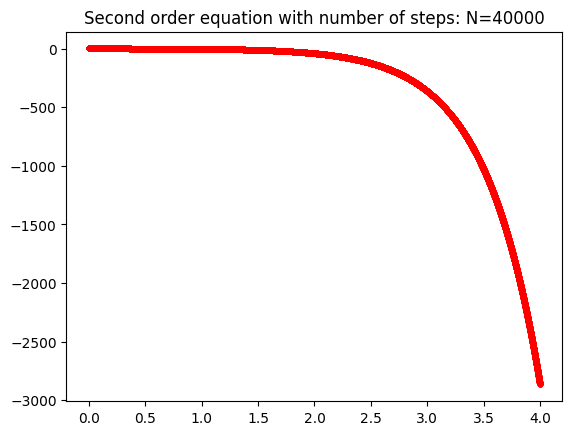

In [ ]:
## visualize the numerical solutions: discrete data points
plt.plot(t, y, '.r-')
plt.title('Second order equation with number of steps: N=%i' %N)
plt.show()

In [ ]:
# Function for numericalSolution. It plots the numerical solution as well.
# Accepts p, q, alpha, and beta.
def numericalSolution(**kwargs):
    p = kwargs.get('p')
    q = kwargs.get('q')
    alpha = kwargs.get('alpha')
    beta = kwargs.get('beta')
    N = 40000
    endt = 4
    dt = (endt - 0)/N
    y0 = alpha
    y1 = dt * beta + y0
    ## give a vector valued t, and print the output
    t = np.linspace(0,endt,num = N, endpoint = False)

    ## make a zero array to store computations
    y = np.zeros(np.size(t))

    y[0] = y0
    y[1] = y1
    # y2 = 2 * y1 - y0 - p * dt * (y1 - y0) - q * dt^2 * y1

    for i in range(1, np.size(t)-1):
        y[i+1] = 2 * y[i] - y[i-1] - p * dt * (y[i] - y[i-1]) - q * y[i] * dt ** 2

    ## visualize the numerical solutions: discrete data points
    plt.plot(t, y, '.r-')
    plt.title('Second order equation with number of steps: N=%i' %N)
    plt.show()

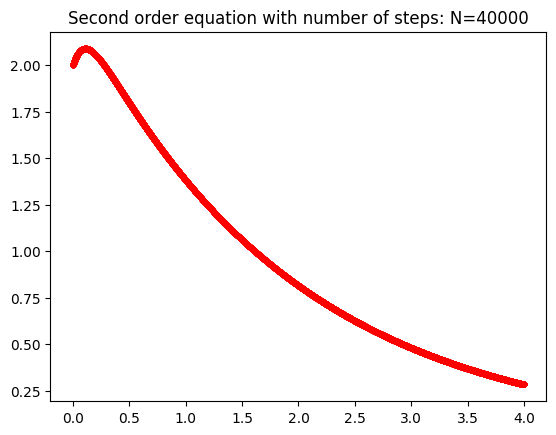

In [ ]:
numericalSolution(p=10, q=5, alpha=2, beta=2)

## Exercise:

Change the values of $p$ and $q$ so that you have roots of different signs. Observe the different behaviors of the solution.


In [ ]:
# Uncomment the function call below and change the values of p, q, alpha, beta
#numericalSolution(p=-3, q=2, alpha=1, beta=0)

We consider the *nonlinear* equation $\frac{d^2y}{dt^2}=(1-y^2)\frac{dy}{dt}-y$, with initial conditions $y(0)=1$, $y'(0)=-1$, and solve the IVP on time interval $[0,4]$.

Notice this is not a problem that we can solve analytically.

In [ ]:
## give a vector valued t, and print the output
t = np.linspace(0,endt,num = N, endpoint = False)

## make a zero array to store computations

y = np.zeros(np.size(t))

## initial condition y0 = 1 y'0 = -1

y[0] = 1
y[1] = -1*dt + y[0]

In [ ]:
## discretize the DE. y_1 for next step, y_0 for current
## step, y_-1 for previous step
## (y_1 - 2y_0 + y_-1)/dt**2 = (1 - y_0**2) * (y_0 - y_-1)/dt - y_0

## iterative step for computing the unknown value y
for i in range(1, np.size(t)-1):
    y[i+1] = dt * (1 - y[i] ** 2) * (y[i] - y[i-1]) - dt ** 2 * y[i] + 2 * y[i] - y[i-1]

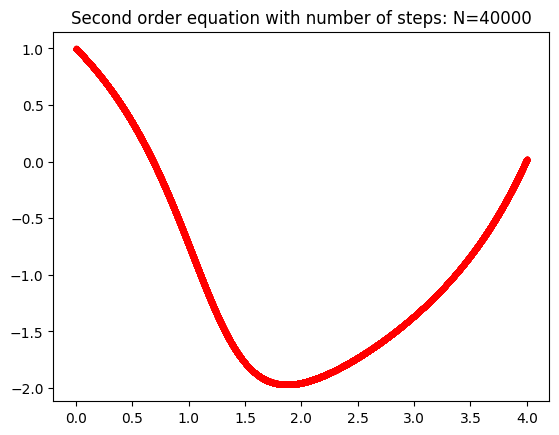

In [ ]:
## visualize the numerical solutions: discrete data points
plt.plot(t, y, '.r-')
plt.title('Second order equation with number of steps: N=%i' %N)
plt.show()

## Exericse:

Change N to 40, 400, and 4000. Run above cells, and plot the images for each. Observe changes in the solution curves with varying N

In [ ]:
## This is a function that takes in a value for N.
def TestN(**kwargs):
  N = kwargs.get("N")
  ## give a vector valued t, and print the output
  endt = 4
  dt = (endt - 0)/N
  t = np.linspace(0,endt,num = N, endpoint = False)

  ## make a zero array to store computations

  y = np.zeros(np.size(t))

  ## initial condition y0 = 1 y'0 = -1

  y[0] = 1
  y[1] = -1*dt + y[0]

  ## (y_1 - 2y_0 + y_-1)/dt**2 = (1 - y_0**2) * (y_0 - y_-1)/dt - y_0

  ## iterative step for computing the unknown value y
  for i in range(1, np.size(t)-1):
      y[i+1] = dt * (1 - y[i] ** 2) * (y[i] - y[i-1]) - dt ** 2 * y[i] + 2 * y[i] - y[i-1]

  plt.plot(t, y, '.r-')
  plt.title('Second order equation with number of steps: N=%i' %N)
  plt.show()

  print(f"{y[-1]}")
  return y[-1]

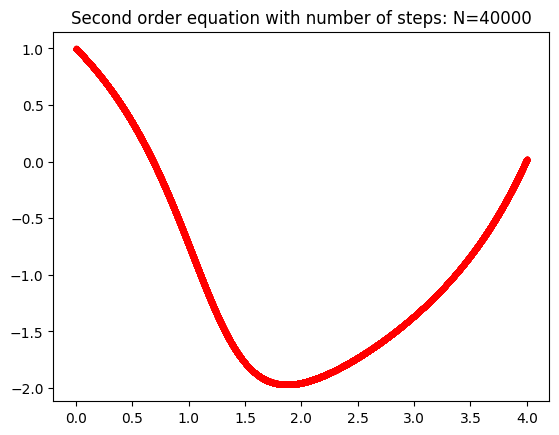

0.020426308783896015


np.float64(0.020426308783896015)

In [ ]:
# The function is called with a value being assigned to N
TestN(N=40000)

### In the following part, we consider a BVP (boundary value problem) where the conditions on the unknown function are imposed at two separate locations.

$u''(x)=f(x)$

$u(0)=\alpha,\ u(1)=\beta$

### We define the length of our vector to be

### The variable $m$

### and the distance between grid points to be

$\frac{1}{m+1}$.

### We solve for U by building the matrix A and F. We have a linear system of m equations for the m unknowns, which can be written in the form

$AU = F$


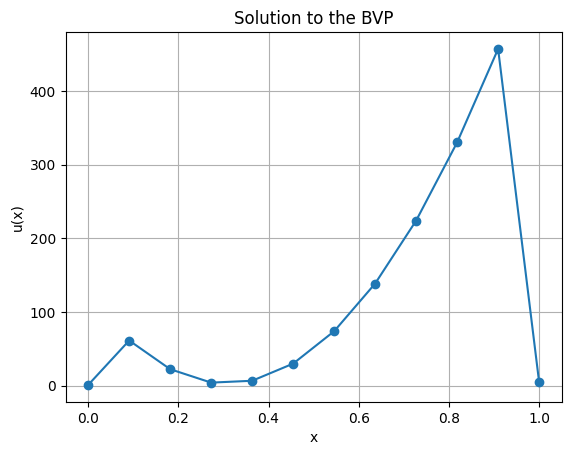

In [ ]:
def bvp(
    alpha, # boundary condition u(0)
    beta,  # boundary condition u(1)
    m,     # length of vector U is m + 2
    f      # our function
    ):

  h = 1 / (m+1) # mesh width (distance between grid points)

  # Building matrix A


  A = np.zeros((m, m))

  np.fill_diagonal(A, -2)
  for i in range(m-1):
    A[i, i+1] = 1
    A[i+1, i] = 1

  # Building matrix F

  F = np.array([f((j+1) * h) for j in range(m)])

  F[0] -= alpha / h**2
  F[-1] -= beta / h**2

  # Solves for U where U = A^-1F

  U = np.linalg.solve(A, F)

  U = np.concatenate(([alpha], U, [beta]))
  # Define the x-axis based on the array length
  x = np.linspace(0, 1, len(U))  # Assuming the domain is [0,1]

  # Plot
  plt.plot(x, U, marker='o', linestyle='-')
  plt.title("Solution to the BVP")
  plt.xlabel("x")
  plt.ylabel("u(x)")
  plt.grid(True)
  plt.show()
  return U

# sample function

def f(x):
  return 2 * np.pi**2 + 1



U = bvp(1,5, 10, f)